##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 6. ML - Algoritmes d’aprenentatge supervisat: Regressió**

### Tasca M6 T01 - Exercicis Python a partir d'un dataset amb informació sobre les vivendes de las afores de bostonHousingData

**Objectius**
* Neteja i interpretació de les dades
* Preprocessats
* Creació de models de regressió (arbres de regressió, random forest, xarxes neuronals, altres models...)
* Utilització de les mètriques per interpretar els resultats
* Estudi i modificació de paràmetres

___________
Lliurament: Enviar l'URL a un repositori anomenat *ML_regressions* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/cristinasprogrammingadventure/ML_regressions** 
___________

### 0. Importamos las librerías necesarias, cargar el dataset y preprocesar los datos 

In [355]:
# cálculos, dataframes, uso genereal
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento de datos,test de hipótesis
from scipy.stats import shapiro
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

# ML : modelos de predicción, regresiones
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# métricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")


In [356]:
bostonHousingData = pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint5_B_ML/housing_data.csv', 
                   sep = ",", encoding_errors= 'replace', engine='python', names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT', 'MEDV'])
bostonHousingData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Conjunto de datos de precios de viviendas de Boston

#### Características del conjunto de datos:

**Descripción del dataset:**

1. **Title: bostonHousingData Housing Dataset**

2. **Sources**:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. **Past Usage**:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. **Relevant Information: Concerns housing values in suburbs of boston**.

5. **Number of Instances**: 506

6. **Number of Attributes**: 13 continuous attributes (including **"class"
                         attribute "MEDV"**), **1 binary-valued attribute**.

7. **Attribute Information**:

    1. **CRIM**      per capita crime rate by town
    2. **ZN**        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. **INDUS**     proportion of non-retail business acres per town
    4. **CHAS**      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. **NOX**       nitric oxides concentration (parts per 10 million)
    6. **RM**        average number of rooms per dwelling
    7. **AGE**       proportion of owner-occupied units built prior to 1940
    8. **DIS**       weighted distances to five bostonHousingData employment centres
    9. **RAD**       index of accessibility to radial highways
    10. **TAX**      full-value property-tax rate per 10,000 dollars
    11. **PTRATIO**  pupil-teacher ratio by town
    12. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. **LSTAT**    % lower status of the population
    14. **MEDV**     Median value of owner-occupied homes in $1000's
    

8. **Missing Attribute Values:  None**.

La variable objetivo (target) es **"MEDV"**


### **Variables e información traducidas al castellano :**

Información de los campos y descripción de los valores más carácterísticos:

* CRIM: tasa de criminalidad per cápita por ciudad.
* ZN: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
* INDUS: proporción de acres de negocios no minoristas por ciudad.
* CHAS: variable ficticia de Charles River (= 1 si la zona limita con el río; 0 en caso contrario).
* NOX: concentración de óxidos nítricos (partes por 10 millones).
* RM: número promedio de habitaciones por vivienda.
* AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* DIS: distancias ponderadas a cinco centros de empleo en Boston.
* RAD: índice de accesibilidad a autopistas radiales.
* TAX: tasa de impuesto a la propiedad de valor total por cada 10,000 dólares.
* PTRATIO: relación alumno-maestro por ciudad.
* B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
* LSTAT: % de estatus socioeconómico bajo de la población.
* MEDV: valor mediano de viviendas ocupadas por sus propietarios en miles de dólares.

Valores de atributos faltantes: Ninguno

* Para nuestro objetvo en este proyecto de ML, nos interesa particularmente la variable dependiente es **MEDV**
* Ella ya viene dada y se trata del precio medio de las viviendas en limes de dólares

### **Resumen estadístico del dataset *bostonHousingData*** :


In [357]:
bostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [358]:
bostonHousingData.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [359]:
# Vemos los valores únicos de cada uno de los atributos
bostonHousingData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [360]:
bostonHousingData.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [361]:
# Comprobamos si hay campos con valor núlo
bostonHousingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [362]:
bostonHousingData.duplicated().sum()

0

**Dos variables se distinguen de las demás por ser categóricas e individibles**. También, son de tipo Int64 mientras las otras son de tipo Float y son resultados de cálculos previos. Estas variables son :

* "CHAS" (Charles River dummy variable, que tiene 2 valores únicos binarios 0 y 1, según el contacto con el río de la ciudad. Es un atributo binario. 
* "RAD" (index of accessibility to radial highways) tiene 9 valores categóricos únicos por lo que más tarde, le podremos aplicar columnas Dummies, que convertirán sus datos en otras 9 columnas adicionales binarias según hagan parte de una categoría o no.
* **Se les cambiará el tipo** para que no aparezcan en los cálculos estadísticos.
* La variable **target es numérica (es un FLOAT)**, por tanto el modelo a emplear será un REGRESOR, que es un modelo SUPERVISADO.

In [363]:
bostonHousingData['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [364]:
bostonHousingData['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [365]:
bostonHousingData[['CHAS', 'RAD']] = bostonHousingData[['CHAS', 'RAD']].astype('category')

In [366]:
bostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [367]:
# Vemos los valores únicos de cada uno de los atributos
bostonHousingData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [368]:
bostonHousingData.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [369]:
# Comprobamos si hay campos con valor núlo
bostonHousingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [370]:
bostonHousingData.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00
PTRATIO,506.0,18.46,2.16,12.60,17.40,19.05,20.20,22.00
B,506.0,356.67,91.29,0.32,375.38,391.44,396.22,396.90


### **Visualización del conjuntos de datos originales**
* Vemos los rangos de valores, destacando particularmente las colunas TAX y B.

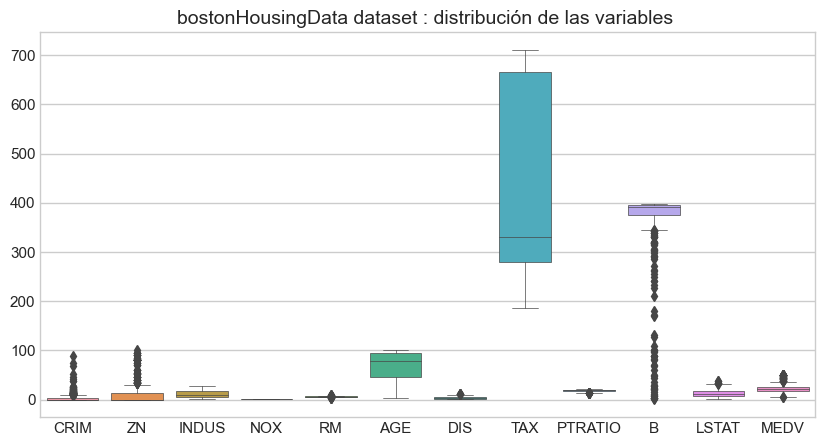

In [371]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data = bostonHousingData, linewidth= 0.5)
plt.title('bostonHousingData dataset : distribución de las variables ', fontsize=14)
plt.show()

**Observaciones:**
* Vemos que los valores tienen rrangos muy diferentes entre las variables
* Hay rangos muy amplios dentro de una misma variable, como es el caso de CRIM, ZN, AGE, TAX, B, MEDV.
* A contnuacón miramos como se **distribuye cada variable y sus outliers**, para determinar los posibles escalados en el preprocesamiento de los datos 

### **Evaluación de distribuciones :** Vizualizamos y evaluamos como se distribuyen los valores de cada variable. 

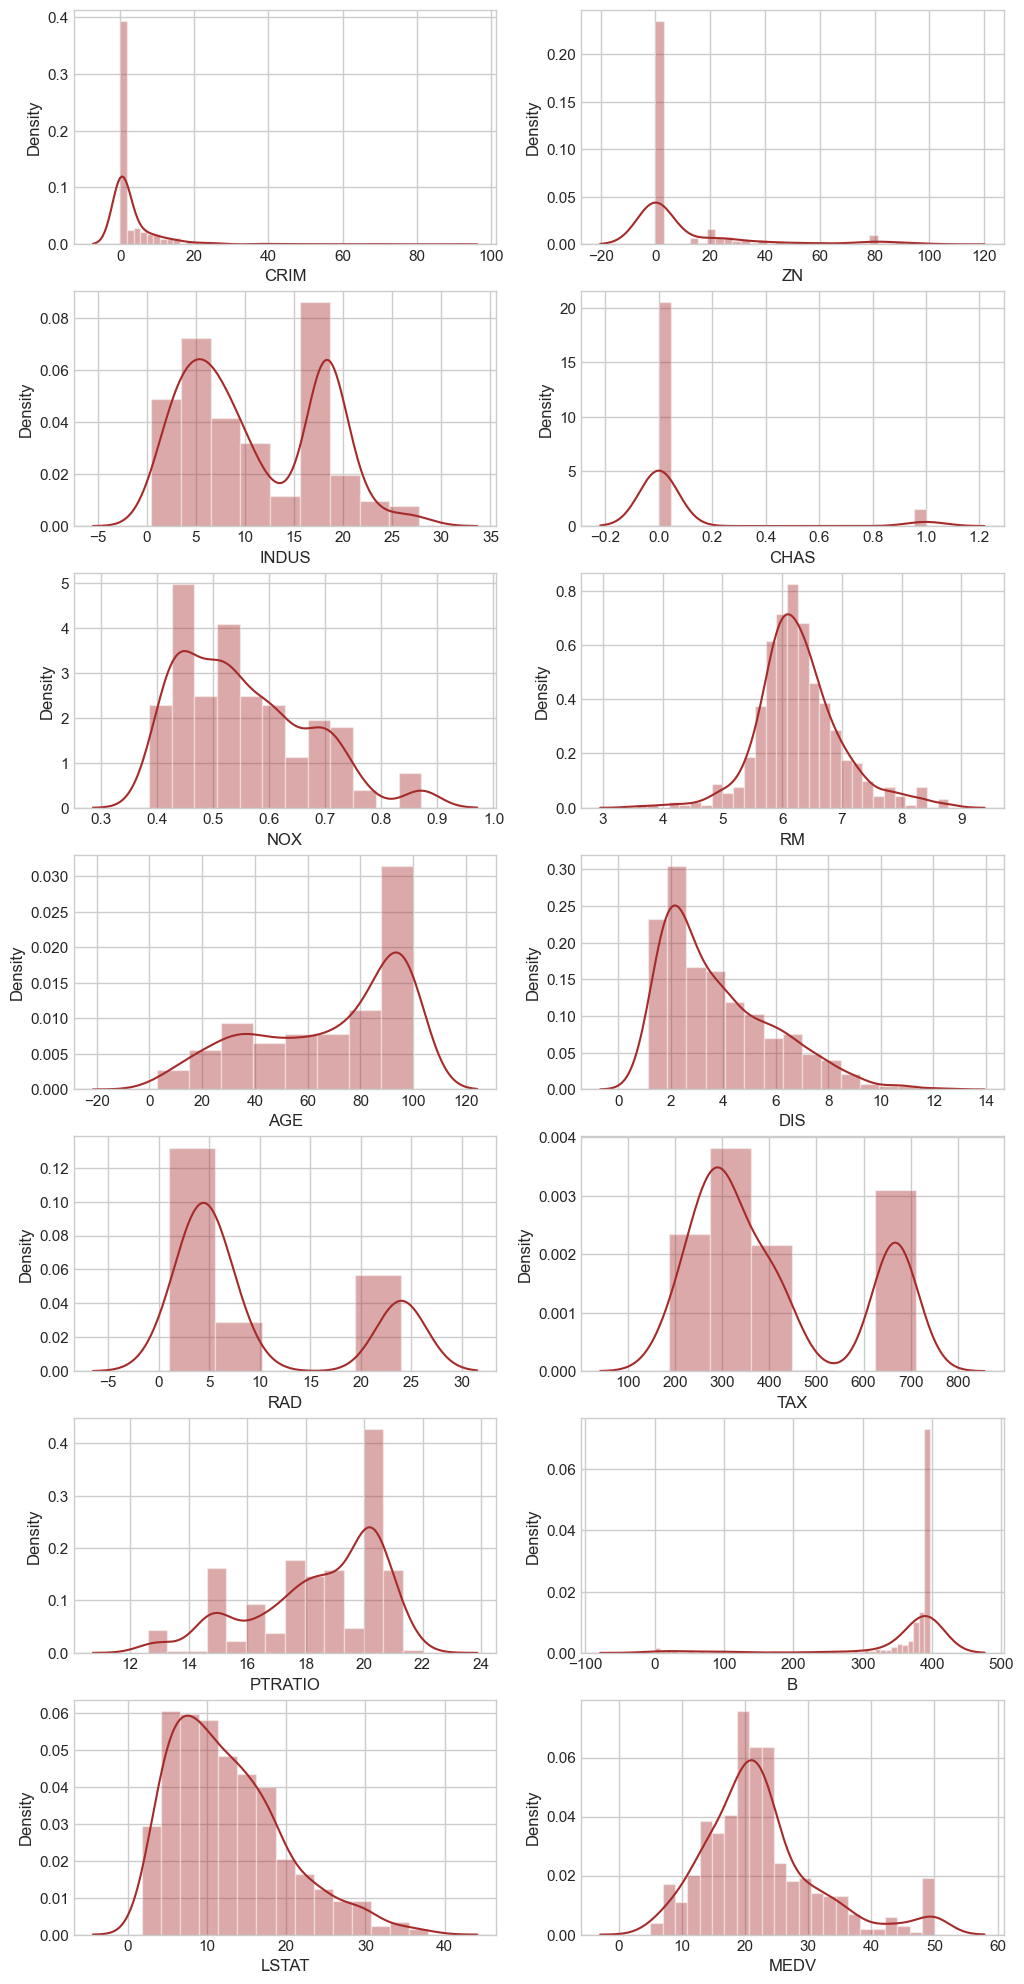

In [372]:
fig, ax1 = plt.subplots(ncols=2, nrows=7, figsize=(12, 25))
k = 0
columns = list(bostonHousingData.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(bostonHousingData[columns[k]], ax = ax1[i][j], color = 'brown')
            ax1[i][j].grid(True)
            k += 1
plt.show()


#### **Tests de normalidad**

In [373]:
# Comprobamos mediante shapiro qué variables presentan distribución gaussinana : sólo Alcalinity of ash es el único que presenta una distribución normal.

from scipy.stats import shapiro
import colorama
from colorama import Fore, Style

col = list(bostonHousingData.columns)

def distr_normal(bostonHousingData):
    normal = []
    for col in bostonHousingData.columns:
        p_valor = shapiro(bostonHousingData[col])[1]
        normal.append(p_valor > 0.05)
    return normal
resultado = distr_normal(bostonHousingData)

for resultado in resultado :
    if resultado is True : 
        print(Fore.GREEN, resultado, Style.RESET_ALL)
    else :
        print( Fore.RED, resultado, Style.RESET_ALL)

 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 


**Observaciones:**
* Aunque la imagen parece indicar que la varable RM tenga una distribución normal, el cálculo mediante Shapiro dice lo contrario
* Podemos afirmar entonces que ninguna de las variables de dataset tiene una distribución normal.

### **Busca de valores atípicos / outliers**

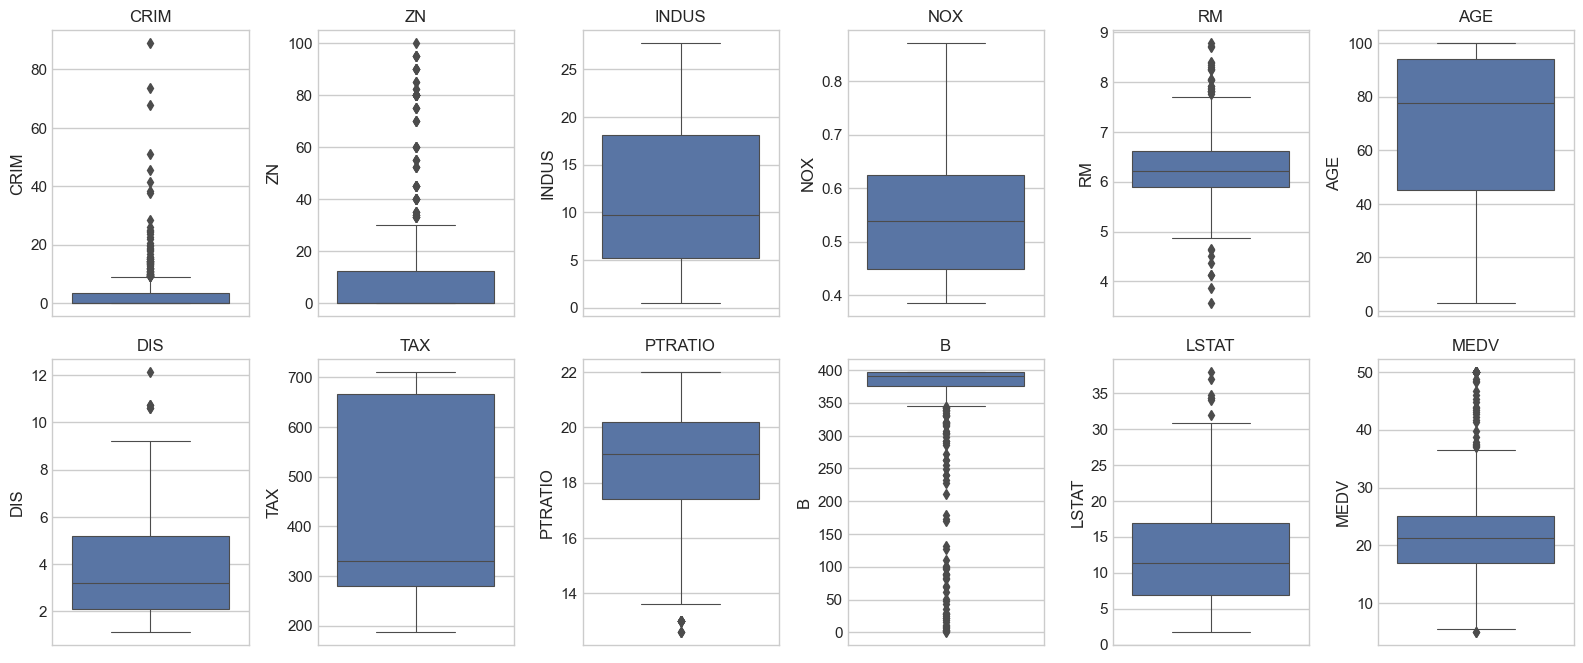


Number of outliers for each variable:
CRIM: 66
ZN: 68
INDUS: 0
NOX: 0
RM: 30
AGE: 0
DIS: 5
TAX: 0
PTRATIO: 15
B: 77
LSTAT: 7
MEDV: 40


In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded your dataset into a DataFrame called bostonHousingData

# Remove non-numeric columns for boxplot and outlier detection
numeric_columns = bostonHousingData.select_dtypes(include=['float64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Iterate through each column and create boxplot
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 6, i + 1)  # 3 rows, 6 columns
    sns.boxplot(y=bostonHousingData[col], linewidth=0.8)
    plt.title(col)

plt.tight_layout()
plt.show()

# Calculate outliers for each column and count them
outliers_count = {}

for col in numeric_columns:
    q1 = bostonHousingData[col].quantile(0.25)
    q3 = bostonHousingData[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = bostonHousingData[(bostonHousingData[col] < lower_bound) | (bostonHousingData[col] > upper_bound)][col]
    outliers_count[col] = len(outliers)
'''    
    if len(outliers) == 0:
        print(f"No outliers found in column {col}")
    else:
        print(f"Outliers in column {col}:")
        print(outliers)
'''
    
# Print the number of outliers for each variable
print("\nNumber of outliers for each variable:")
for col, count in outliers_count.items():
    if count == 0:
        print(f"\033[92m{col}: {count}\033[0m")  # Print in green
    else:
        print(f"\033[91m{col}: {count}\033[0m")  # Print in red



**Observaciones:**
* Acabamos de ver que **CRIM, ZN, PTRATIO, B LSTAT y MEDV tienen outliers**
* Las columnas que **NO tienen outliers** son : **INDUS, NOX, AGE, RAD y  TAX**.

### **Busca de correlaciones :** Visualización de la correlación interna entre las variables del conjunto para ver como se influyen entre ellas


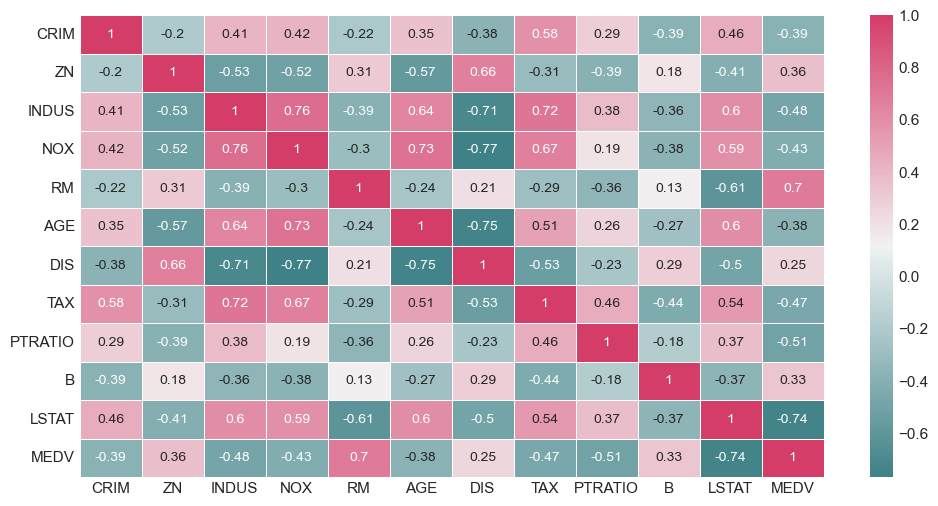

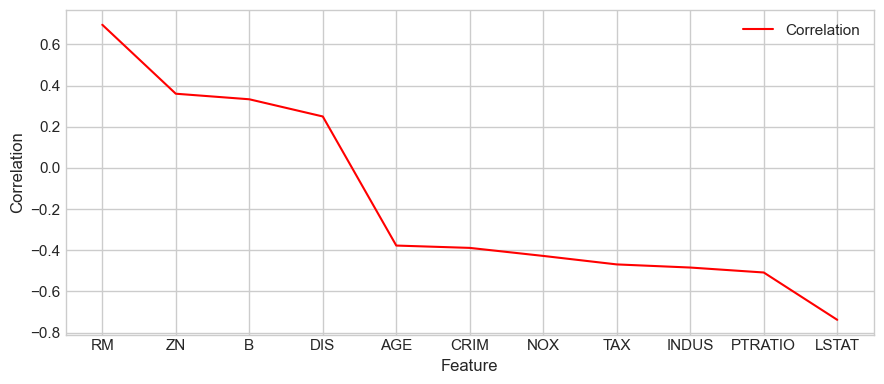


Correlation Values:
RM: 0.69536
ZN: 0.36045
B: 0.33346
DIS: 0.24993
AGE: -0.37695
CRIM: -0.38830
NOX: -0.42732
TAX: -0.46854
INDUS: -0.48373
PTRATIO: -0.50779
LSTAT: -0.73766


In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
corr = bostonHousingData.corr()
cmap = sns.diverging_palette(200, 0, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={"fontsize": 10}, linewidth=0.5, cmap=cmap)
plt.show()

plt.figure(figsize=(9, 4))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:], label="Correlation", color="red") # gráfico de línea
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# Printing correlation values as text
print("\nCorrelation Values:")
for feature, correlation in corr["MEDV"].sort_values(ascending=False)[1:].items():
    if correlation > 0:
        color = "green"
    else:
        color = "red"
    print(f"\033[91m{feature}: {correlation:.5f}") if correlation < 0 else print(f"\033[92m{feature}: {correlation:.5f}")


**Observaciones:**
* Las correlaciones positivas con el valor Target (MEDV) son :

        RM: 0.69536 (la más fuerte), luego ZN: 0.36045, B: 0.33346, DIS: 0.24993 y CHAS: 0.17526
        RM siendo el número de habitaciones por vivienda, es normal que la correlación con el precio medio sea alta, aunque otros factores también influyen.
        
* Las correlaciones naegativas con el valor Target (MEDV) son : 

        LSTAT: -0.73766 (la más fuerte) y PTRATIO: -0.50779 ; luego AGE: -0.37695 , RAD: -0.38163, CRIM: -0.38830, NOX: -0.42732, TAX: -0.46854 e INDUS: -0.48373
        Las variables que más influyen en el precio en una relación opuesta, son LSTAT, o el % de población de estatus socioeconomico bajo y el ratio de alumnos por profesor por municipio PTRATIO
              


#### **Más en detalle**

* **Para sacar conclusiones, hay que saber que** :
    - En la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo 
    - No hay restricciones sobre la circulación y los trailers podían y aún pueden entrar en cualquier zona de la ciudad, sea residencial, comercial o industrial
    - Las casas hasta los años 50 se han edificado sobre las principales vías de las ciudades, mientras que a partir de los años 60-70, las zonas residenciales se han ido edificando en núcleos más alejados, buscando paz e intimidad y las grandes arterias se quedaron para los comercios, equipamientos, industrias o las grandes torres de pisos. 
    

* **Se observa una fuerte correlación positiva entre** :
    - "NOX" e "INDUS" : concentración de óxidos nítricos y proporción de acres de negocios no minoristas por ciudad, lo que indica que las zonas donde existen negocios no minoristas pueden estar más contaminadas por los gases que provienen de los vehículos, sobretodo de coches y camiones / traileres diesel (en la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo).
    - "NOX" y "TAX" : concentración de óxidos nítricos y porcentaje de impuesto a la propiedad sugiere que en las zonas más concurridas por los vehículos se pagan más impuestos por superfície
    - "INDUS" y "TAX" : a mayor proporción de acres de negocios no minoristas por ciudad, mayor porcentaje de impuesto a la propiedad (como en la observación anterior) 
    - "NOX" y "AGE" : concentración de óxidos nítricos y proporción de unidades de viviendas ocupadas por sus propietarios construidas antes de 1940 indica que donde las casas son más antiguas y en régimen de propiedad,es en las zonas más concurridas y a la vez, más contaminadas.
    - "ZN" y "DIS" : proporción de terreno residencial zonificado en lotes de más de 25,000 pies cuadrados (pueden ser bloques de pisos, o casas con grandes terrenos) y distancias ponderadas a cinco centros de empleo en bostonHousingData.
    
    
* **Se observa una fuerte correlación negativa entre** :
    - DIS y NOX : distancias ponderadas a cinco centros de empleo en bostonHousingData y concentración de óxidos nítricos, por lo que cuanto más alejadas están las viviendas de los centros de empleo, más calidad de aire disfrutan en sus casas ; cuanto más cerca, más NOX y peor calidad de aire
    - DIS y INDUS : distancias ponderadas a cinco centros de empleo en bostonHousingData y suelo industrial o de comercio mayorista viene a decir que cuando nos alejamos de los 5 centros de empleo de bostonHousingData, la proporción de parcelas grandes disminuye, pero que estando cerca de estos polos de empleo, nos encontramos muchas.
    - DIS y AGE : distancias ponderadas a cinco centros de empleo en bostonHousingData y propietarios viviendo en casas de antes del 1940 nos indica una parte importante de las casas antiguas y situadas cerca de los polos de empleo resultan interesantes para los porpietarios, o que a mucha gente le interesa vivir cerca de trabajo y servicios.

    - Se observa que B (proporción de gente negra) está en muchos casos, incluso para la tasa criminal, en una correlación neutra o negativa con las otras variables.
    


**Trazaremos los **gráficos de regresión** para observar y comprender las variables con mayor correlación y la variable de salida (el precio) tienen correlación positiva o negativa.**

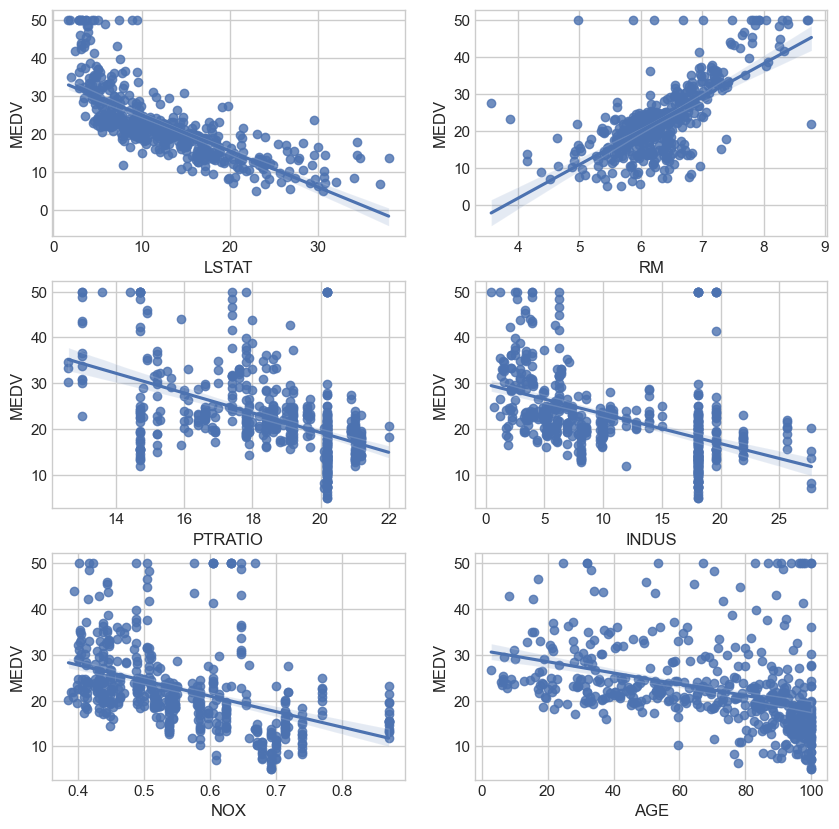

In [376]:
fig, ax1 = plt.subplots(3,2, figsize=(10, 10))
k = 0
columns = ["LSTAT","RM","PTRATIO","INDUS","NOX","AGE"]
for i in range(3):
    for j in range(2):
            sns.regplot(bostonHousingData[columns[k]], bostonHousingData["MEDV"],ax=ax1[i][j])
            sns.set(style= "whitegrid")
            ax1[i][j].grid(True)
            k += 1
plt.show()

* Nuevamente, los gráficos nos confirman que de las características **LSTAT, RM son las que más influyen en el precio de las viviendas**
* Seguidas de PTRATIO, INDUS y TAX  tienen la mayor correlación con el valor medio de las viviendas MEDV, donde solo la **RM (habitaciones)tiene una correlación positiva con el MEDV**, mientras que las otras características tienen una correlación negativa. 
* Sin embargo, las diferentes variables también pueden tener correlación entre ellas, como la tiene TAX (impuestos sobre bienes inmobiliarios, directamente relacionada con el valor de la propiedas).

**En resumen**, tenemos una correlación positiva fuerte entre las variables NOX (concentración de óxidos nítricos-partes por 10 millones-) e INDUS(proporción de acres de negocios no minoristas por ciudad) que nos indica que las zonas donde existen negocios no minoristas aparentemente están más contaminadas. También existe una correlación positiva fuerte entre MEDV Y RM, lo que nos indica que el número de habitaciones influye al alza en el previo de la vivienda. Tenemos una correlación positiva entre las variables AGE(proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y NOX que también parece indicar una relación entre la antigüedad de las viviendas y la contaminación de la zona. Es de destacar la corrrelación negativa entre MEDV Y LSTAT, que nos indica que a mayor porcentaje de población con status socioeconomico bajo, el precio de la vivienda disminuye.

In [377]:
bostonHousingData_dummy = pd.get_dummies(data = bostonHousingData, columns= ['RAD'])
bostonHousingData_dummy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,22.0,1,0,0,0,0,0,0,0,0


## **Transformaciones sobre los datos de las variables dependiendo de su tipo y distribución**

Realizamos la estandarización de los atributos, en función de si existen o no outliers, utilizando RobustScaler para el primer caso y MinMaxScaler en el segundo.

* **Distriucón normal**: si tienen distribución normal se aplica StandarScaler

       -> aquí no tenemos ninguna normal
        
     
* **Numéricas con outliers** : aplicar RobustScaler

        -> MEDV y CRIM, ZN, DIS, PTRATIO, B, LSTAT

* **Numéricas sin outliers** : aplicar MinMaxScaler

        -> INDUS, NOX, AGE, TAX
        
* **Categóricas**: dummificar si hace falta.

        -> RAD (dummificar)
        -> CHAS ya es binaria, por lo que no hace flata dummificarla



 

#### **Transformación "dummy" a variable binaria**

In [378]:
df_housing = pd.get_dummies(data = bostonHousingData, columns= ['RAD'])
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,22.0,1,0,0,0,0,0,0,0,0


#### **Transformación con Robust Scaler**

In [379]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

# Creamos la variable que contenga las etiquetas de las columnas (no normalizamos la variable objetivo MEDV)
feat_lb = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])

# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)
df_housing_trans


,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.069593,1.44,0.496612,0.285777,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,0.287940,0.569789,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,1.323171,0.569789,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,1.069783,0.924391,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,1.271680,0.924391,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.521003,-0.236007,0.696429,0.026382,-0.168916
502,-0.058759,0.00,-0.119919,-0.297887,0.696429,0.261902,-0.227886
503,-0.054450,0.00,1.039973,-0.336744,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.793360,-0.265053,0.696429,0.096414,-0.487756


In [380]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)
df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.070,1.44,2.31,0,0.538,0.497,65.2,0.286,296.0,-1.339,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.064,0.00,7.07,0,0.469,0.288,78.9,0.570,242.0,-0.446,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.064,0.00,7.07,0,0.469,1.323,61.1,0.570,242.0,-0.446,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062,0.00,2.18,0,0.458,1.070,45.8,0.924,222.0,-0.125,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052,0.00,2.18,0,0.458,1.272,54.2,0.924,222.0,-0.125,...,36.2,0,0,1,0,0,0,0,0,0


#### **Transformación de resto de variables con MinMaxScaler**

In [381]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])

# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)
df_housing_trans.head().round(3)

,INDUS,NOX,AGE,TAX
0,0.068,0.315,0.642,0.208
1,0.242,0.173,0.783,0.105
2,0.242,0.173,0.599,0.105
3,0.063,0.150,0.442,0.067
4,0.063,0.150,0.528,0.067


In [382]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)
df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.070,1.44,0.068,0,0.315,0.497,0.642,0.286,0.208,-1.339,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.064,0.00,0.242,0,0.173,0.288,0.783,0.570,0.105,-0.446,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.064,0.00,0.242,0,0.173,1.323,0.599,0.570,0.105,-0.446,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062,0.00,0.063,0,0.150,1.070,0.442,0.924,0.067,-0.125,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052,0.00,0.063,0,0.150,1.272,0.528,0.924,0.067,-0.125,...,36.2,0,0,1,0,0,0,0,0,0


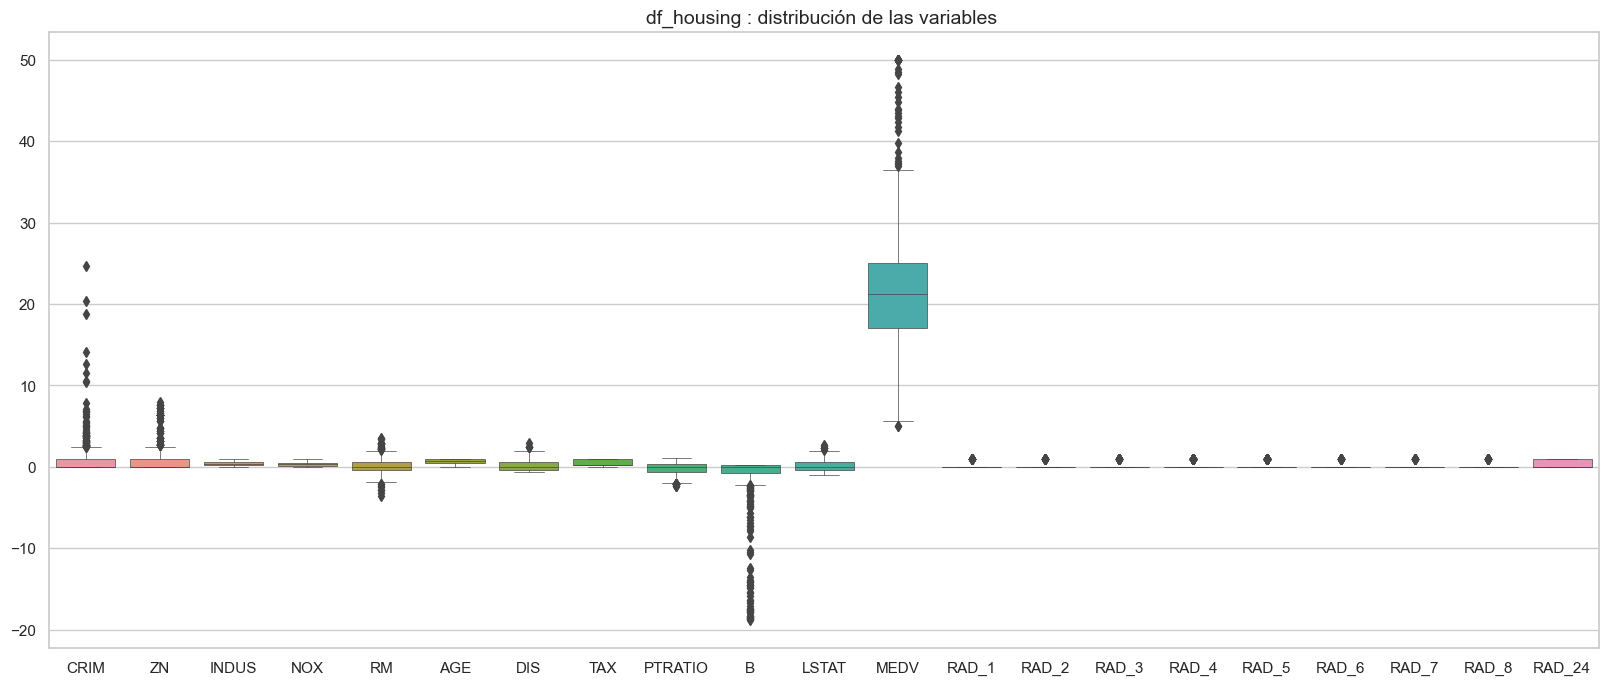

In [383]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data = df_housing, linewidth= 0.5)
plt.title('df_housing : distribución de las variables ', fontsize=14)
plt.show()

#### **Notas sobre el escalado de la variable target MEDV :**

* la literatura dice que la variable dependiente se puede o no escalar, dependendo de si es muy sesgada o no, y de otros factores.
* En este caso vimos en el gráfico de distribución que ella no es muy sesgada (skewed), solamente lo es un poco hacia la izquierda y tiene unos valores más numerosos entorno a los Vemos que al no haber escalado : 

        En la mayoría de los casos, no es necesario escalar o aplicar transformaciones a la variable objetivo en un proyecto de regresión. La variable objetivo representa la cantidad que estás tratando de predecir y generalmente se deja como está. Escalar o transformar la variable objetivo podría alterar su significado original y hacer que la interpretación de los resultados sea más complicada.

        Sin embargo, podría haber escenarios donde escalar o transformar la variable objetivo sea beneficioso. Por ejemplo:

        1. Distribuciones sesgadas: Si la variable objetivo exhibe un sesgo significativo, aplicar transformaciones como la transformación logarítmica podría ayudar a que la distribución sea más simétrica, lo que podría mejorar el rendimiento de algunos modelos de regresión.

        2. Heterocedasticidad: Si la varianza de la variable objetivo no es constante a lo largo de su rango, transformar la variable objetivo podría ayudar a estabilizar la varianza, lo cual es beneficioso para modelos que asumen homocedasticidad (varianza constante).

Referencias:

        1. "Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists" de Alice Zheng y Amanda Casari:** Este libro ofrece información sobre varios aspectos de la ingeniería de características, incluido el manejo de variables objetivo. Discute las consideraciones y compensaciones involucradas en la transformación de variables objetivo.

        2. "Python Data Science Handbook" de Jake VanderPlas: Este libro cubre varios temas en ciencia de datos usando Python. El capítulo 5 específicamente discute la ingeniería de características y proporciona orientación sobre el manejo de variables objetivo en tareas de regresión.

        Recuerda, la decisión de escalar o transformar la variable objetivo debe basarse en las características específicas de tu conjunto de datos y los requisitos de tu tarea de modelado. Siempre valida el impacto de cualquier paso de preprocesamiento en el rendimiento de tu modelo a través de experimentación y evaluación cuidadosas.
        
* **Hemos decidido en un principio NO escalar MEDV porque no se veía muy sesgada, pero tras leer la teoría y al ver como se alejan estos valores de los del resto de variables, se procede finalmente a escalar esta variable también, como se puede observar en el gráfico de abajo.**
    

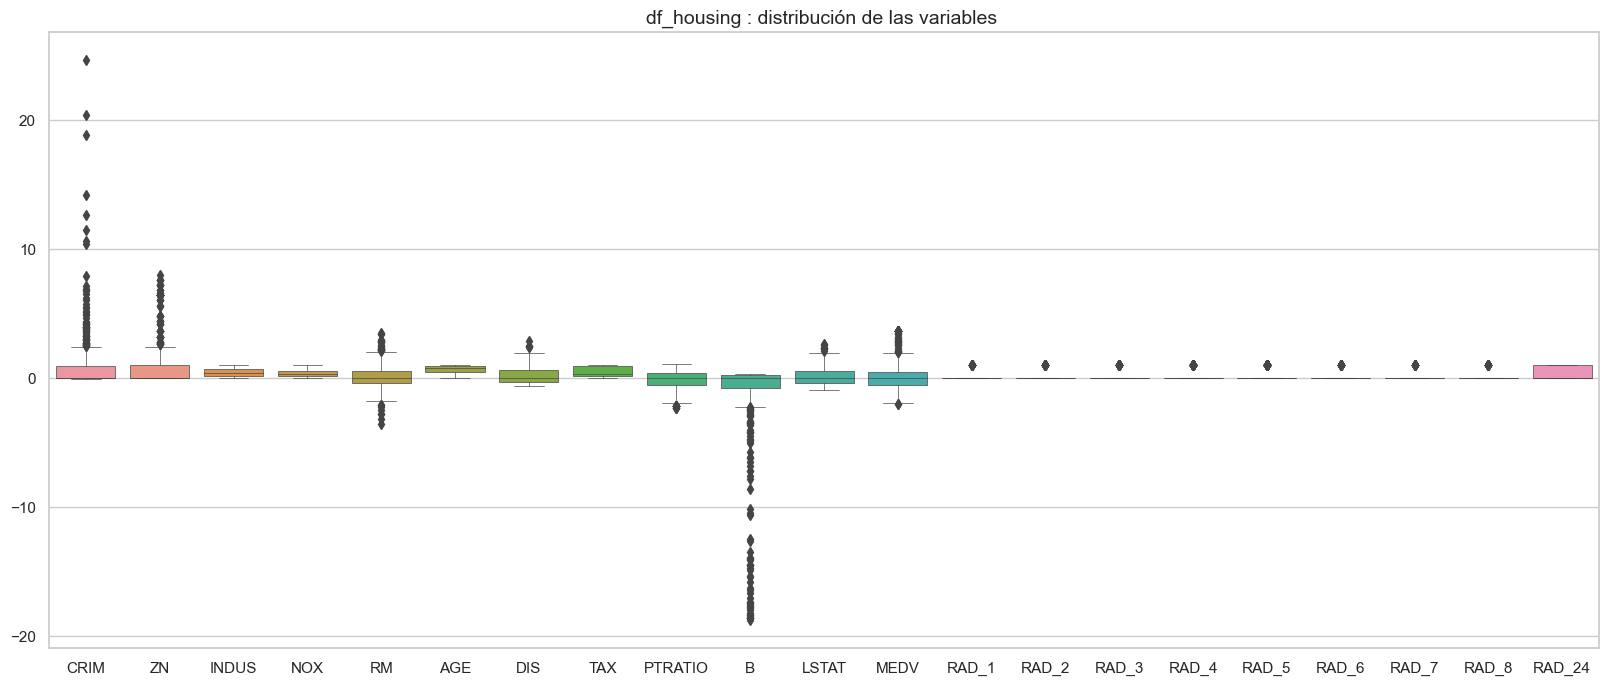

In [384]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()
feat_lb = ['MEDV']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])

# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)
df_housing.update(df_housing_trans)

# Vemos el nuevo DataFrame
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data = df_housing, linewidth= 0.5)
plt.title('df_housing : distribución de las variables ', fontsize=14)
plt.show()


## **Partir el conjunto de datos en train i test.**

**Preparamos el split:**

* **X=>"features"** (input) : usaremos todas las columnas menos la última,  es decir, es información sobre vivienda y las características de su entorno
* **y=>"target"** (output) : usaremos solamente la última columna, que es la del precio de las viviendas en miles de dólares

In [385]:
X = df_housing.drop(['MEDV'],axis=1)
y = df_housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(y_test))


404
102


In [386]:
display(X_train.shape, y_train.shape)

(404, 21)

(404,)

In [387]:
display(X_test.shape, y_test.shape)

(102, 21)

(102,)

________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **Exercici 1**
### **Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV).**


**Regresión Lineal**:
La Regresión Lineal es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. En su forma más básica, busca ajustar una línea recta a los datos, de modo que pueda predecir la variable dependiente en función de las variables independientes. Se basa en el supuesto de que la relación entre las variables es lineal y sigue el principio de mínimos cuadrados para encontrar la mejor línea de ajuste.

**RandomForestRegressor**:
RandomForestRegressor es un algoritmo de aprendizaje supervisado utilizado para problemas de regresión. Pertenece a la familia de métodos de conjunto, que combina múltiples modelos de árbol de decisión para mejorar la precisión de las predicciones. RandomForestRegressor crea múltiples árboles de decisión durante el entrenamiento y realiza predicciones tomando el promedio de las predicciones individuales de cada árbol. Esto proporciona una predicción robusta y reduce el riesgo de sobreajuste en comparación con un solo árbol de decisión.

### **Aplicar los modelos de LINEAR REGRESSION y RANDOM FOREST REGRESSOR**

**Importar, ajustar, predecir, visualizar y medir el rendimiento de un modelo**

* Primero, se crean modelos predeterminados para la Regresión Lineal y RandomForestRegressor
* Luego, cada modelo se ajusta a los datos de entrenamiento.
* Se realizan predicciones utilizando cada modelo en los datos de prueba.
* Se calculan las métricas de evaluación (Error Cuadrático Medio y R2 Score) para cada modelo.


In [388]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [389]:
# Create default models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print evaluation results
print("Linear Regression:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2, '\n')

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


Linear Regression:
MSE: 0.39022325234195804
R2 Score: 0.6615687658684817 

Random Forest Regression:
MSE: 0.12809010578612579
R2 Score: 0.888910534364448


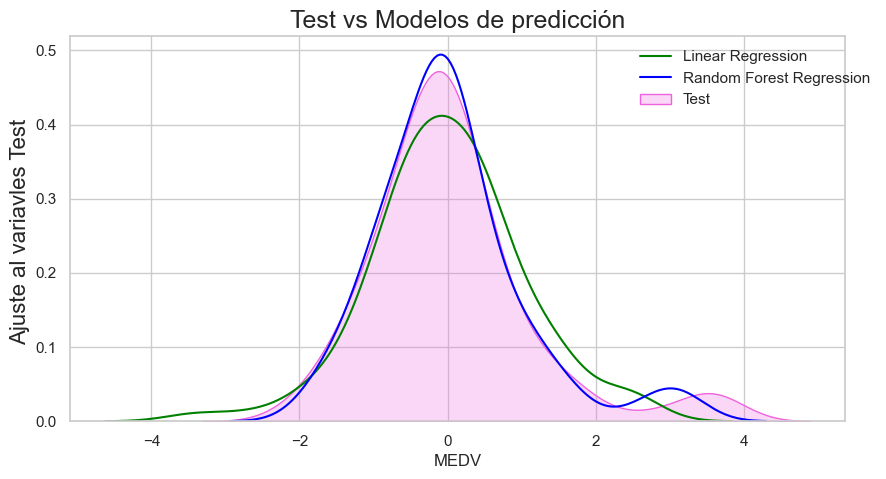

In [390]:
# Set the style and create a new figure
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Plot the KDE plots for the predicted values of Linear Regression and Random Forest Regression
sns.kdeplot(lr_pred, label='Linear Regression', color='green', fill=False)
sns.kdeplot(rf_pred, label='Random Forest Regression', color='blue', fill=False)

# Plot the KDE plot for the actual test values
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)

# Add title and labels
plt.title("Test vs Modelos de predicción", fontsize=18)
plt.ylabel('Ajuste al variavles Test ', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

# Show the plot
plt.show()


El gráfico muestra como el modelo Random Forest se ajusta mjor a las varables test reales.

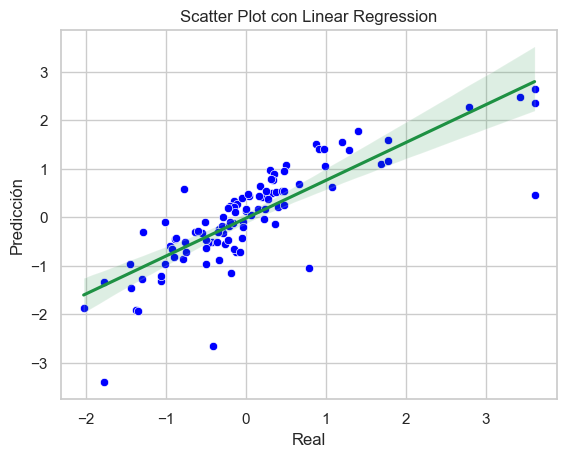

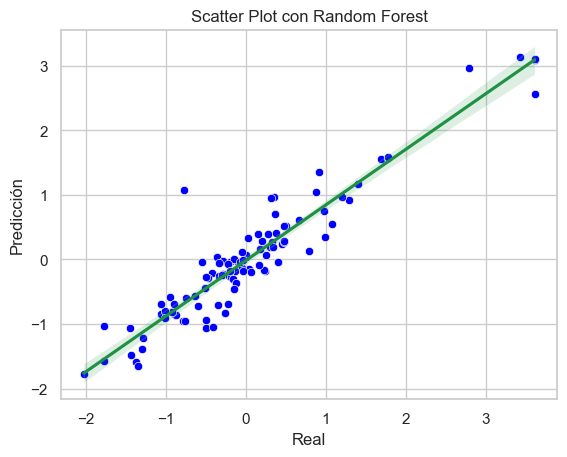

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con valores reales y predichos para cada modelo
resultados_lr = pd.DataFrame({'Real': y_test, 'Predicción': lr_pred})
resultados_rf = pd.DataFrame({'Real': y_test, 'Predicción': rf_pred})

# Crear un gráfico de dispersión para el modelo de Regresión Lineal
scatterplot_lr = sns.scatterplot(x="Real", y="Predicción", data=resultados_lr, color='blue')

# Agregar la línea de regresión para el modelo de Regresión Lineal
sns.regplot(x="Real", y="Predicción", data=resultados_lr, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot_lr.set_title("Scatter Plot con Linear Regression")
scatterplot_lr.set_xlabel("Real")
scatterplot_lr.set_ylabel("Predicción")

# Mostrar el gráfico para el modelo de Regresión Lineal
plt.show()

# Crear un gráfico de dispersión para el modelo de Random Forest
scatterplot_rf = sns.scatterplot(x="Real", y="Predicción", data=resultados_rf, color='blue')

# Agregar la línea de regresión para el modelo de Random Forest
sns.regplot(x="Real", y="Predicción", data=resultados_rf, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot_rf.set_title("Scatter Plot con Random Forest")
scatterplot_rf.set_xlabel("Real")
scatterplot_rf.set_ylabel("Predicción")

# Mostrar el gráfico para el modelo de Random Forest
plt.show()


**Observaciones** :

-> **Basado en estos últimos gráficos** y en los cálculos anteriores, las predicciones del modelo de Regresión **Random Forest se ajustan mejor a la realidad que el Regresión Lineal**, siguiendo de más cerca la línea de tendencia

# **Exercici 2**

### **Compara els dos models de regressió en base al MSE i al R2.**

In [392]:
# Resultados de evaluación
results = {
    "Modelo": ["Regresión Lineal", "Random Forest Regression"],
    "Error Cuadrático Medio (MSE)": [lr_mse, rf_mse],
    "R2 Score": [lr_r2, rf_r2]
}

# Crear DataFrame
comparative_results = pd.DataFrame(results)

# Mostrar DataFrame
print("Resultados Comparativos:")
comparative_results

Resultados Comparativos:


,Modelo,Error Cuadrático Medio (MSE),R2 Score
0,Regresión Lineal,0.390223,0.661569
1,Random Forest Regression,0.128090,0.888911


Estos resultados indican el rendimiento de los dos modelos de regresión en el conjunto de datos. Hacemos una breve interpretación:

**Regresión Lineal**:

* **MSE: 0.3902**

Este valor representa la diferencia cuadrada promedio entre los valores predichos y los valores reales. Valores más bajos indican un mejor rendimiento del modelo.

* **R cuadrado (R2): 0.6616**

El puntaje R2 mide la proporción de la varianza en la variable dependiente (target) que es predecible a partir de las variables independientes (características). Varía de 0 a 1, donde valores más altos indican un mejor ajuste del modelo a los datos. Un puntaje R2 de 0.6616 sugiere que el modelo de regresión lineal explica aproximadamente el 66.16% de la varianza en la variable objetivo.

**Random Forest Regressor:**

* **MSE: 0.1245**

El MSE para el modelo de Regresión del Bosque Aleatorio es significativamente más bajo en comparación con el modelo de Regresión Lineal, lo que indica que las predicciones del modelo del Bosque Aleatorio están más cerca de los valores reales.

* **R cuadrado (R2): 0.8920**

El puntaje R2 para el modelo de Regresión del Bosque Aleatorio también es más alto, lo que indica un mejor ajuste a los datos en comparación con el modelo de Regresión Lineal. Un puntaje R2 de 0.8920 sugiere que el modelo del Bosque Aleatorio explica aproximadamente el 89.20% de la varianza en la variable objetivo.

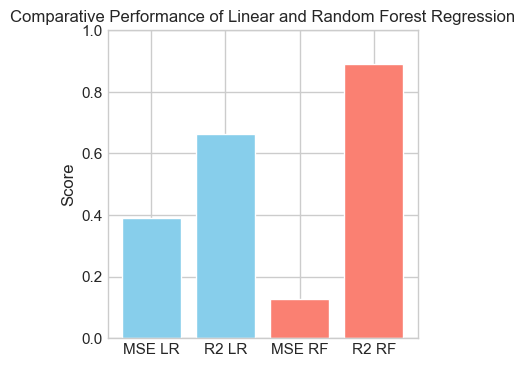

In [393]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-whitegrid')

# Plot the MSE and R2 scores
plt.figure(figsize=(4, 4))

# Linear Regression
plt.bar(['MSE LR', 'R2 LR'], [lr_mse, lr_r2], color='skyblue')

# Random Forest Regression
plt.bar(['MSE RF', 'R2 RF'], [rf_mse, rf_r2], color='salmon')

# Add labels and title
plt.ylabel('Score')
plt.title('Comparative Performance of Linear and Random Forest Regression')
plt.ylim(0, 1)

# Show plot
plt.show()


**Observaciones** :

-> **Basado en estos resultados**, el modelo de Regresión **Random Forest Regressor supera al modelo de Regresión Lineal** en términos **tanto de MSE como de puntaje R2.**

________________________________________________________________________________________________________________________________________________________________________________________________________________________
# **Exercici 3**
### **Entrena els models utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

Se realizará la búsqueda de hiperparámetros para cada modelo utilizando GridSearchCV, guardará los mejores parámetros y el mejor estimador para cada modelo, y luego entrenará cada modelo con sus mejores parámetros. Finalmente, calculará y mostrará los resultados de evaluación (MSE y R2) para los mejores modelos.

**Primero sería interesante obtener los parámetros con los que trabaja cada uno de los modelos por defecto :**

In [394]:
# Crear instancias de los modelos sin especificar hiperparámetros
lr_model_default = LinearRegression()
rf_model_default = RandomForestRegressor()

# Obtener los parámetros predeterminados de los modelos
params_lr_default = lr_model_default.get_params()
params_rf_default = rf_model_default.get_params()

# Mostrar los parámetros predeterminados de la regresión lineal
print("Parámetros predeterminados de Linear Regression:")
print(params_lr_default, '\n')

# Mostrar los parámetros predeterminados de Random Forest
print("Parámetros predeterminados de Random Forest:")
print(params_rf_default)


Parámetros predeterminados de Linear Regression:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 

Parámetros predeterminados de Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**Ahora vamos a realizar una búsqueda de hiperparámetros utilizando GridSearchCV para cada modelo.** 

GridSearchCV, que es una técnica semejante al cross-validation para encontrar los valores de los hyperparametros optimos de un set de parámetros. Se hace un grid para ajustar los parámetros de los modelos de aprendizaje automatico. Es una herramienta de búsqueda exhaustiva de cada combinación de valores de parámetros especificados. Por ejemplo, si especificamos 2 valores para profundidad máxima y 3 para n_estimadores, Grid Search iterará sobre 6 combinaciones posibles.


In [395]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV parameters
param_grid_lr = {
    # Define the hyperparameters grid for Linear Regression
    # No hyperparameters to tune for Linear Regression
}

param_grid_rf = {
    # Define the hyperparameters grid for Random Forest Regression
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

# GridSearchCV for Random Forest Regression
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

**Ahora después de haber definido el modelo y los parámetros, guardamos los mejores parámetros y el mejor estimador para cada modelo**. 

El best_estimator de cada modelo incluye los best_params en sus cálculos. Durante la búsqueda de hiperparámetros utilizando GridSearchCV, se ajustan múltiples modelos con diferentes combinaciones de hiperparámetros y se evalúan utilizando la métrica de puntuación especificada. Una vez que se encuentra la combinación de hiperparámetros que maximiza o minimiza la métrica de puntuación (según el problema), GridSearchCV selecciona automáticamente esta combinación como la mejor y ajusta un nuevo estimador utilizando estos hiperparámetros óptimos.

Entonces, cuando se obtiene el best_estimator, ese nuevo modelo se ajusta los hiperparámetros óptimos encontrados durante la búsqueda de hiperparámetros. Este nuevo modelo incluye automáticamente estos mejores hiperparámetros en sus cálculos, lo que significa que ya está optimizado para rendir mejor en el conjunto de datos de prueba.

In [396]:
# Get best parameters and best estimator for each model
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

Este código se utiliza típicamente después de realizar una búsqueda en el Grid para encontrar los mejores hiperparámetros para un modelo de aprendizaje automático. Aquí está lo que hace cada línea:

1. `best_params_lr = grid_search_lr.best_params_`: Esta línea recupera los mejores parámetros encontrados durante la búsqueda en la cuadrícula para el modelo de Regresión Lineal (`lr`). Se asume que `grid_search_lr` es una instancia de `GridSearchCV` o un método similar de ajuste de hiperparámetros. El atributo `.best_params_` contiene un diccionario con los mejores hiperparámetros encontrados durante la búsqueda en la cuadrícula.

2. `best_estimator_lr = grid_search_lr.best_estimator_`: Esta línea recupera el mejor estimador (modelo) encontrado durante la búsqueda en la cuadrícula para el modelo de Regresión Lineal. El atributo `.best_estimator_` contiene el objeto del modelo con los mejores hiperparámetros encontrados durante la búsqueda en la cuadrícula aplicada a los datos de entrenamiento.

3. `best_params_rf = grid_search_rf.best_params_`: De manera similar, esta línea recupera los mejores parámetros encontrados durante la búsqueda en la cuadrícula para el modelo de Regresión del Bosque Aleatorio (`rf`).

4. `best_estimator_rf = grid_search_rf.best_estimator_`: De manera similar, esta línea recupera el mejor estimador (modelo) encontrado durante la búsqueda en la cuadrícula para el modelo de Regresión del Bosque Aleatorio.

Entonces, aunque el objeto `best_estimator` no incluye explícitamente los `best_params`, puedes usar `best_params` por separado para ver la combinación de hiperparámetros que produjo el modelo de mejor rendimiento. El objeto `best_estimator` en sí mismo es el modelo con esos hiperparámetros ya establecidos y listos para ser utilizados para hacer predicciones.

In [397]:
# Imprimir los best_params y best_estimator para la regresión lineal
print("Best Parameters for Linear Regression:")
print(best_params_lr, '\n')

print("Best Estimator for Linear Regression:")
print(best_estimator_lr, '\n')

# Imprimir los best_params y best_estimator para el bosque aleatorio
print("Best Parameters for Random Forest Regression:")
print(best_params_rf, '\n')

print("Best Estimator for Random Forest Regression:")
print(best_estimator_rf)


Best Parameters for Linear Regression:
{} 

Best Estimator for Linear Regression:
LinearRegression() 

Best Parameters for Random Forest Regression:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100} 

Best Estimator for Random Forest Regression:
RandomForestRegressor(max_depth=7, random_state=42)


**Finalmente, entrenaremos cada modelo con sus mejores parámetros y hacemos las predicciones**

In [398]:
# Train each model with the best parameters
best_estimator_lr.fit(X_train, y_train)
best_estimator_rf.fit(X_train, y_train)

# Predictions
lr_pred_best = best_estimator_lr.predict(X_test)
rf_pred_best = best_estimator_rf.predict(X_test)

**Calculamos los resultados de evaluación por cada modelo**

In [399]:
# Evaluation metrics for the best models
lr_mse_best = mean_squared_error(y_test, lr_pred_best)
rf_mse_best = mean_squared_error(y_test, rf_pred_best)

lr_r2_best = r2_score(y_test, lr_pred_best)
rf_r2_best = r2_score(y_test, rf_pred_best)

# Print evaluation results for the best models
print("Best Linear Regression:")
print("MSE:", lr_mse_best)
print("R2 Score:", lr_r2_best, '\n') 

print("Best Random Forest Regression:")
print("MSE:", rf_mse_best)
print("R2 Score:", rf_r2_best)

Best Linear Regression:
MSE: 0.39022325234195804
R2 Score: 0.6615687658684817 

Best Random Forest Regression:
MSE: 0.13114508350515475
R2 Score: 0.8862610257216641


In [400]:
# Resultados de evaluación
results_best = {
    "Modelo": ["Regresión Lineal", "Random Forest", "Best Regresión Lineal", "Best Random Forest"],
    "Error Cuadrático Medio (MSE)": [lr_mse, rf_mse, lr_mse_best, rf_mse_best],
    "R2 Score": [lr_r2, rf_r2, lr_r2_best, rf_r2_best]
}

# Crear DataFrame
comparative_results_best = pd.DataFrame(results_best)

# Mostrar DataFrame
print("Resultados Comparativos:")
comparative_results_best

Resultados Comparativos:


,Modelo,Error Cuadrático Medio (MSE),R2 Score
0,Regresión Lineal,0.390223,0.661569
1,Random Forest,0.128090,0.888911
2,Best Regresión Lineal,0.390223,0.661569
3,Best Random Forest,0.131145,0.886261


**Resultados de evaluación** : los resultados no mejoran. 


________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **Exercici 4**
### **Compara el seu rendiment emprant l’aproximació train/test o emprant totes les dades (validació interna / cross validation)**

Para elo utilizaremos la **validación cruzada (cross_val_score)**, que es una función que nos permite ver la métrica de un modelo en diferentes divisiones de los datos. En nuestro caso al ser un problema de regresión, utilizaremos cmo scoring los valores neg_mean_squared_error y r2 para comparar los resultados.


In [401]:
from sklearn.model_selection import cross_val_score
import numpy as np


En Python, los **dobles asteriscos** se utilizan para desempaquetar diccionarios. Entonces, **best_params_rf** es un diccionario que contiene los mejores hiperparámetros para el modelo de Regresión Random Forest. Al utilizar **, desempaquetamos el diccionario best_params_rf y pasamos su contenido como argumentos de palabra clave al constructor de RandomForestRegressor. Esto  permite establecer de manera conveniente los **hiperparámetros del modelo sin especificar manualmente cada uno**. Es una forma concisa de pasar múltiples parámetros a una función o constructor utilizando un diccionario.

In [402]:
# Crear el modelo de Regresión Lineal con los mejores parámetros
cv_lr = LinearRegression(**best_params_lr)

# Realizar la validación cruzada para la regresión lineal
cv_scores_lr_r2 = cross_val_score(cv_lr, X, y, cv=5, scoring='r2')
cv_scores_lr_mse = cross_val_score(cv_lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores de MSE a positivos
cv_scores_lr_mse = -cv_scores_lr_mse

# Imprimir los puntajes de validación cruzada para la regresión lineal
print("Cross-Validation Scores for Linear Regression:")
print("R2 Scores:", cv_scores_lr_r2)
print("MSE Scores:", cv_scores_lr_mse)
print()

# Crear el modelo de RandomForest con los mejores parámetros
cv_rf = RandomForestRegressor(**best_params_rf)

# Realizar la validación cruzada para el bosque aleatorio
cv_scores_rf_r2 = cross_val_score(cv_rf, X, y, cv=5, scoring='r2')
cv_scores_rf_mse = cross_val_score(cv_rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores de MSE a positivos
cv_scores_rf_mse = -cv_scores_rf_mse

# Imprimir los puntajes de validación cruzada para el RandomForest
print("Cross-Validation Scores for Random Forest Regression:")
print("R2 Scores:", cv_scores_rf_r2)
print("MSE Scores:", cv_scores_rf_mse)
print()

# Calcular las desviaciones estándar para cada modelo
std_lr = cv_scores_lr_r2.std()
std_rf = cv_scores_rf_r2.std()

# Imprimir las desviaciones estándar
print("\033[1;30mStandard Deviation for Linear Regression:\033[0m", std_lr)
print("\033[1;30mStandard Deviation for Random Forest Regression:\033[0m", std_rf)

# Elegir el modelo con la desviación estándar más pequeña
if std_lr < std_rf:
    print("CONCLUSION :\033[1m\033[92mLinear Regression has the smallest standard deviation.\033[0m")
else:
    print("CONCLUSION : \033[1m\033[92mRandom Forest Regression has the smallest standard deviation.\033[0m", '\n')


Cross-Validation Scores for Linear Regression:
R2 Scores: [ 0.61238312  0.74278118  0.5536421   0.08098992 -0.36475742]
MSE Scores: [0.21047631 0.36817824 0.56206296 1.26741012 0.57053846]

Cross-Validation Scores for Random Forest Regression:
R2 Scores: [0.76829533 0.84899219 0.68676847 0.48317018 0.24125453]
MSE Scores: [0.12253505 0.20407093 0.3521113  0.7150724  0.3004929 ]

Standard Deviation for Linear Regression: 0.41102642222104263
Standard Deviation for Random Forest Regression: 0.21910476310092575
CONCLUSION : Random Forest Regression has the smallest standard deviation. 



**Observaciones**: 

* Las desviaciones estándar de **0.411 para Linear Regression** y **0.219 para Random Forest Regression** son muy **altas** !

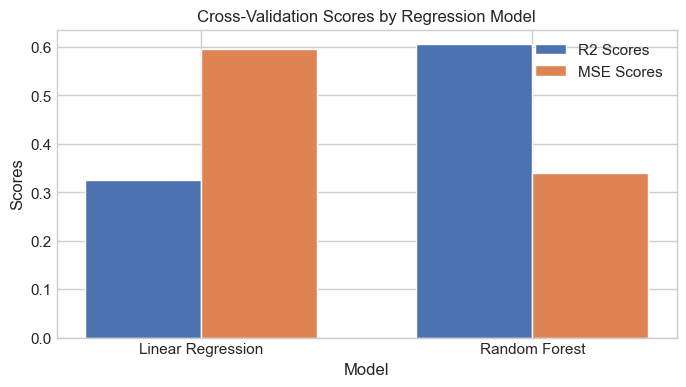

In [403]:
# Crear una lista de modelos y sus puntajes de validación cruzada
models = ['Linear Regression', 'Random Forest']
r2_scores = [cv_scores_lr_r2.mean(), cv_scores_rf_r2.mean()]
mse_scores = [cv_scores_lr_mse.mean(), cv_scores_rf_mse.mean()]

# Configurar el gráfico
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = range(len(models))

plt.bar(index, r2_scores, bar_width, label='R2 Scores')
plt.bar([i + bar_width for i in index], mse_scores, bar_width, label='MSE Scores')

# Agregar etiquetas y título
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Cross-Validation Scores by Regression Model')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Mostrar el gráfico
plt.show()


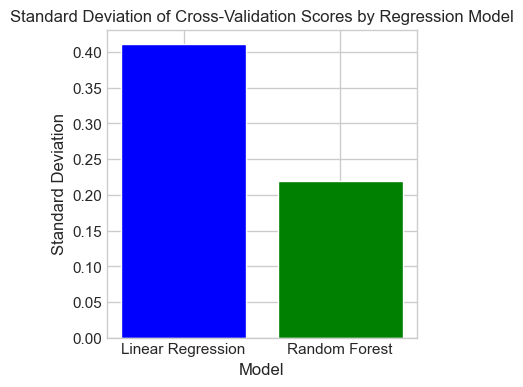

In [404]:
import matplotlib.pyplot as plt

# Create a list of models and their standard deviations
models = ['Linear Regression', 'Random Forest']
std_devs = [std_lr, std_rf]

# Set up the plot
plt.figure(figsize=(4, 4))
plt.bar(models, std_devs, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Cross-Validation Scores by Regression Model')

# Show the plot
plt.show()



**Observaciones :** 

**En algunos casos estamos obteniendo un MSE superior a 1 y un valor negativo para el R2**. Puede ser debido a la naturaleza de cómo se calculan estos valores y a la configuración específica del modelo y datos.

1. **MSE superior a 1**: El MSE es una medida de la diferencia entre los valores predichos por el modelo y los valores reales. Un MSE superior a 1 significa que el modelo está haciendo predicciones que difieren en promedio en más de 1 unidad del valor real. Esto puede indicar que el modelo no está ajustando bien los datos y que está cometiendo errores grandes en algunas de las predicciones.

2. **Valor negativo para R2**: El coeficiente de determinación (R2) mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un valor negativo para R2 significa que el modelo es peor que un modelo trivial que siempre predice la media de la variable dependiente. Esto puede suceder cuando el modelo es muy malo y hace predicciones aleatorias o cuando el modelo está sobreajustando los datos.

Estas discrepancias pueden deberse a varios factores, como el tamaño del conjunto de datos, la complejidad del modelo, la calidad de las características o la presencia de valores atípicos en los datos. Es importante considerar estos resultados como señales de que el modelo puede necesitar ajustes o mejoras adicionales. También puede ser útil en un futuro revisar la configuración del modelo, la selección de características y la calidad de los datos para abordar estas discrepancias.

### **Comparación de los resultados obtenidos**

**En resumen, dados los resultados de los cálculos de las esvaciones estándar**:
* **Random Forest Regression es el modelo que obtiene la menor desviación estándar, por lo que es "mejor"**. 
* Sin embargo, algunos valores son muy dispares lo que indica poca homogeneidad en los resultados que se pueden obtener. 
* Para mejorarlos, podríamos utilizar clústers menos numerosos (3), o bien desde la etapa del escalado y transformación de los datos, se podría escalar de otra manera. 
* Se podría elegir un modelo de Regression más complejo y más parametrizable como XGBoost Regressor.


# **Exercici 5**
### **No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions**.


Repetimos todos los pasos realizados entre el ejercicio 1 y el 4, pero antes sacaremos la columna "RM" de los datos.

In [405]:
X = df_housing.drop(['RM','MEDV'],axis=1)
y = df_housing['MEDV']

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [407]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0,0,1,0,0,0,0,0,0


#### 5.1 **Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV).**

In [408]:
# Create default models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print evaluation results
print("Linear Regression:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2, '\n')


print("Random Forest Regression:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


Linear Regression:
MSE: 0.3610888638153595
R2 Score: 0.6868363197765288 

Random Forest Regression:
MSE: 0.21150162146559842
R2 Score: 0.8165697345203451


**MSE y R2**: el resultado ha **empeorado ligeramente** al quitar el detalle de cúantes habitaciones hay por vivienda, que como vimos al principio en el EDA, esta muy correlacionado con el precio (MEDV)

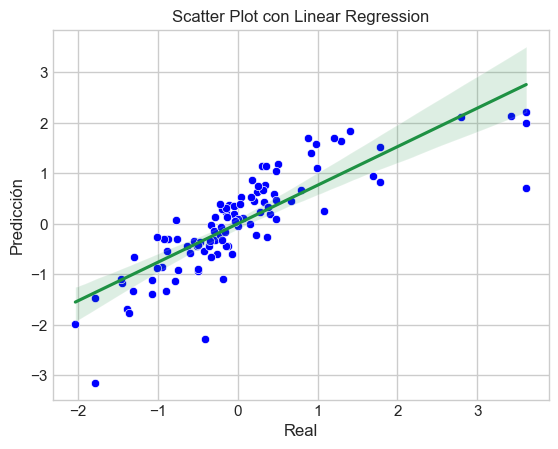

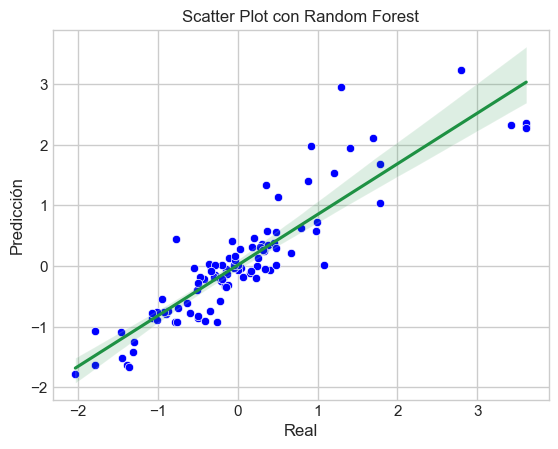

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con valores reales y predichos para cada modelo
resultados_lr = pd.DataFrame({'Real': y_test, 'Predicción': lr_pred})
resultados_rf = pd.DataFrame({'Real': y_test, 'Predicción': rf_pred})

# Crear un gráfico de dispersión para el modelo de Regresión Lineal
scatterplot_lr = sns.scatterplot(x="Real", y="Predicción", data=resultados_lr, color='blue')

# Agregar la línea de regresión para el modelo de Regresión Lineal
sns.regplot(x="Real", y="Predicción", data=resultados_lr, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot_lr.set_title("Scatter Plot con Linear Regression")
scatterplot_lr.set_xlabel("Real")
scatterplot_lr.set_ylabel("Predicción")

# Mostrar el gráfico para el modelo de Regresión Lineal
plt.show()

# Crear un gráfico de dispersión para el modelo de Random Forest
scatterplot_rf = sns.scatterplot(x="Real", y="Predicción", data=resultados_rf, color='blue')

# Agregar la línea de regresión para el modelo de Random Forest
sns.regplot(x="Real", y="Predicción", data=resultados_rf, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot_rf.set_title("Scatter Plot con Random Forest")
scatterplot_rf.set_xlabel("Real")
scatterplot_rf.set_ylabel("Predicción")

# Mostrar el gráfico para el modelo de Random Forest
plt.show()


**Observaciones** :

-> **Sin la variable RM**, las predicciones del modelo de Regresión **Random Forest aún se ajustan algo mejor a la realidad que el Regresión Lineal**, pero son mucho más **parecidos** que en las observaciones originales del Ejercicio 1. 

**Obtener los parámetros con los que trabaja cada uno de los modelos por defecto :**

In [410]:
# Crear instancias de los modelos sin especificar hiperparámetros
lr_model_default = LinearRegression()
rf_model_default = RandomForestRegressor()

# Obtener los parámetros predeterminados de los modelos
params_lr_default = lr_model_default.get_params()
params_rf_default = rf_model_default.get_params()

# Mostrar los parámetros predeterminados de la regresión lineal
print("Parámetros predeterminados de Linear Regression:")
print(params_lr_default, '\n')

# Mostrar los parámetros predeterminados de Random Forest
print("Parámetros predeterminados de Random Forest:")
print(params_rf_default)


Parámetros predeterminados de Linear Regression:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 

Parámetros predeterminados de Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**Búsqueda de hiperparámetros utilizando GridSearchCV para cada modelo.** 


In [411]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV parameters
param_grid_lr = {
    # Define the hyperparameters grid for Linear Regression
    # No hyperparameters to tune for Linear Regression
}

param_grid_rf = {
    # Define the hyperparameters grid for Random Forest Regression
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

# GridSearchCV for Random Forest Regression
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

**Ahora después de haber definido el modelo y los parámetros, guardamos los mejores parámetros y el mejor estimador para cada modelo**. 

In [412]:
# Get best parameters and best estimator for each model
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

In [413]:
# Imprimir los best_params y best_estimator para la regresión lineal
print("Best Parameters for Linear Regression:")
print(best_params_lr, '\n')

print("Best Estimator for Linear Regression:")
print(best_estimator_lr, '\n')

# Imprimir los best_params y best_estimator para el bosque aleatorio
print("Best Parameters for Random Forest Regression:")
print(best_params_rf, '\n')

print("Best Estimator for Random Forest Regression:")
print(best_estimator_rf)


Best Parameters for Linear Regression:
{} 

Best Estimator for Linear Regression:
LinearRegression() 

Best Parameters for Random Forest Regression:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300} 

Best Estimator for Random Forest Regression:
RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)


Si observamos atentamente, los mejores parámetros para el conjunto de antes (con RM) y el actual (sin RM) no son los mismos. Por ejemplo, 'n_estimators' eran 100 y ahora, 300.**

**Finalmente, entrenaremos cada modelo con sus mejores parámetros y hacemos las predicciones**

In [414]:
# Train each model with the best parameters
best_estimator_lr.fit(X_train, y_train)
best_estimator_rf.fit(X_train, y_train)

# Predictions
lr_pred_best = best_estimator_lr.predict(X_test)
rf_pred_best = best_estimator_rf.predict(X_test)

**Calculamos los resultados de evaluación por cada modelo**

In [415]:
# Evaluation metrics for the best models
lr_mse_best_sinRM = mean_squared_error(y_test, lr_pred_best)
rf_mse_best_sinRM = mean_squared_error(y_test, rf_pred_best)

lr_r2_best_sinRM = r2_score(y_test, lr_pred_best)
rf_r2_best_sinRM = r2_score(y_test, rf_pred_best)

# Print evaluation results for the best models
print("Best Linear Regression:")
print("MSE:", lr_mse_best_sinRM)
print("R2 Score:", lr_r2_best_sinRM, '\n') 

print("Best Random Forest Regression:")
print("MSE:", rf_mse_best_sinRM)
print("R2 Score:", rf_r2_best_sinRM)

Best Linear Regression:
MSE: 0.3610888638153595
R2 Score: 0.6868363197765288 

Best Random Forest Regression:
MSE: 0.21335645900078723
R2 Score: 0.8149610785717823


* **MSE y R2**: el resultado ha **empeorado ligeramente** al quitar el detalle de cúantes habitaciones hay por vivienda, que como vimos al principio en el EDA, esta muy correlacionado con el precio (MEDV)
* Tampoco no cambian estos resultados con los mejores hyperparámetros entre el conjunto de datos escalao pero sin RM, igual que pasaba en el Exercicio 3.

In [416]:
# Crear el modelo de Regresión Lineal con los mejores parámetros
cv_lr = LinearRegression(**best_params_lr)

# Realizar la validación cruzada para la regresión lineal
cv_scores_lr_r2 = cross_val_score(cv_lr, X, y, cv=5, scoring='r2')
cv_scores_lr_mse = cross_val_score(cv_lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores de MSE a positivos
cv_scores_lr_mse = -cv_scores_lr_mse

# Imprimir los puntajes de validación cruzada para la regresión lineal
print("Cross-Validation Scores for Linear Regression:")
print("R2 Scores:", cv_scores_lr_r2)
print("MSE Scores:", cv_scores_lr_mse)
print()

# Crear el modelo de RandomForest con los mejores parámetros
cv_rf = RandomForestRegressor(**best_params_rf)

# Realizar la validación cruzada para el bosque aleatorio
cv_scores_rf_r2 = cross_val_score(cv_rf, X, y, cv=5, scoring='r2')
cv_scores_rf_mse = cross_val_score(cv_rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores de MSE a positivos
cv_scores_rf_mse = -cv_scores_rf_mse

# Imprimir los puntajes de validación cruzada para el RandomForest
print("Cross-Validation Scores for Random Forest Regression:")
print("R2 Scores:", cv_scores_rf_r2)
print("MSE Scores:", cv_scores_rf_mse)
print()

# Calcular las desviaciones estándar para cada modelo
std_lr = cv_scores_lr_r2.std()
std_rf = cv_scores_rf_r2.std()

# Imprimir las desviaciones estándar
print("\033[1;30mStandard Deviation for Linear Regression:\033[0m", std_lr)
print("\033[1;30mStandard Deviation for Random Forest Regression:\033[0m", std_rf)

# Elegir el modelo con la desviación estándar más pequeña
if std_lr < std_rf:
    print("CONCLUSION :\033[1m\033[92mLinear Regression has the smallest standard deviation.\033[0m")
else:
    print("CONCLUSION : \033[1m\033[92mRandom Forest Regression has the smallest standard deviation.\033[0m", '\n')


Cross-Validation Scores for Linear Regression:
R2 Scores: [0.41972878 0.66215572 0.39580106 0.54432973 0.36041432]
MSE Scores: [0.31508778 0.48358403 0.76081961 0.62841652 0.26737955]

Cross-Validation Scores for Random Forest Regression:
R2 Scores: [0.62108935 0.83032205 0.39580652 0.6664557  0.34393429]
MSE Scores: [0.20365504 0.24978286 0.76841573 0.46330984 0.25224352]

Standard Deviation for Linear Regression: 0.11160653295577001
Standard Deviation for Random Forest Regression: 0.1795098282925234
CONCLUSION :Linear Regression has the smallest standard deviation.


**Observaciones**: 

* Las desviaciones estándar en el dataset anterior **CON RM** de **0.411 para Linear Regression** y **0.219 para Random Forest Regression** eran muy **altas** !
* Las desviaciones estándar tras **quitar RM** ahora son de **0.111 para Linear Regression** y **0.179 para Random Forest Regression** siguen siendo algo altas, pero han disminuído mucho.
* La de Linear Regression ha bajado por debajo de la otra.

In [417]:
import pandas as pd

# Create a DataFrame for Linear Regression Cross-Validation Scores
cv_lr_data = {'Model': ['Linear Regression'] * 5,
              'CV Fold': ['1', '2', '3', '4', '5'],
              'R2 Score': cv_scores_lr_r2,
              'MSE Score': cv_scores_lr_mse}
cv_lr_df = pd.DataFrame(cv_lr_data)

# Create a DataFrame for Random Forest Cross-Validation Scores
cv_rf_data = {'Model': ['Random Forest Regression'] * 5,
              'CV Fold': ['1', '2', '3', '4', '5'],
              'R2 Score': cv_scores_rf_r2,
              'MSE Score': cv_scores_rf_mse}
cv_rf_df = pd.DataFrame(cv_rf_data)

# Concatenate both DataFrames
cv_scores_df = pd.concat([cv_lr_df, cv_rf_df], ignore_index=True)

# Print the table
cv_scores_df


,Model,CV Fold,R2 Score,MSE Score
0,Linear Regression,1,0.419729,0.315088
1,Linear Regression,2,0.662156,0.483584
2,Linear Regression,3,0.395801,0.760820
3,Linear Regression,4,0.544330,0.628417
4,Linear Regression,5,0.360414,0.267380
5,Random Forest Regression,1,0.621089,0.203655
6,Random Forest Regression,2,0.830322,0.249783
7,Random Forest Regression,3,0.395807,0.768416
8,Random Forest Regression,4,0.666456,0.463310
9,Random Forest Regression,5,0.343934,0.252244


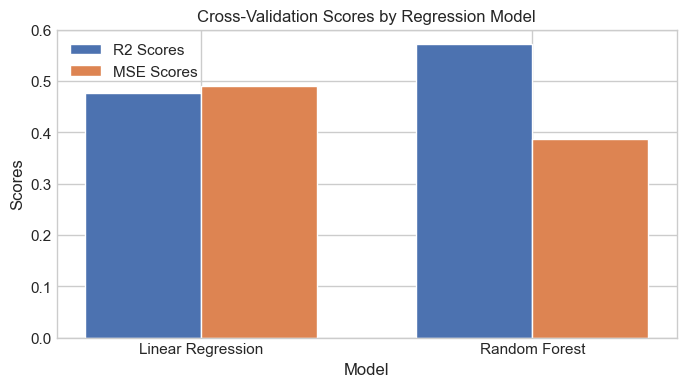

In [418]:
# Crear una lista de modelos y sus puntajes de validación cruzada
models = ['Linear Regression', 'Random Forest']
r2_scores = [cv_scores_lr_r2.mean(), cv_scores_rf_r2.mean()]
mse_scores = [cv_scores_lr_mse.mean(), cv_scores_rf_mse.mean()]

# Configurar el gráfico
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = range(len(models))

plt.bar(index, r2_scores, bar_width, label='R2 Scores')
plt.bar([i + bar_width for i in index], mse_scores, bar_width, label='MSE Scores')

# Agregar etiquetas y título
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Cross-Validation Scores by Regression Model')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Mostrar el gráfico
plt.show()


Se observa que en este caso, cross validation indica una mejora la capabilidad de Linear Regression respecto a como era antes, aún sendo por debajo de Random Forest.

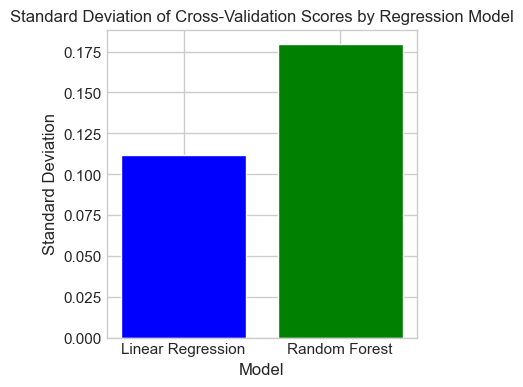

In [419]:
import matplotlib.pyplot as plt

# Create a list of models and their standard deviations
models = ['Linear Regression', 'Random Forest']
std_devs = [std_lr, std_rf]

# Set up the plot
plt.figure(figsize=(4, 4))
plt.bar(models, std_devs, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Cross-Validation Scores by Regression Model')

# Show the plot
plt.show()



En cambio, si en el **dataset que incluye RM** los resultads eran los siguientes, con **desviaciones estndar muy altas** : 

    Standard Deviation for Linear Regression: 0.41102642222104263
    Standard Deviation for Random Forest Regression: 0.2123355382771886
    CONCLUSION : Random Forest Regression has the smallest standard deviation

Aquí vemos que **excluyendo RM**, claramente la desviación estándar para la **Linear Regression baja mucho, y éste modelo ahora queda mejor posicionado que el Random Forest en este aspecto**:

    Standard Deviation for Linear Regression: 0.11160653295577001
    Standard Deviation for Random Forest Regression: 0.17345419236011209
    CONCLUSION :Linear Regression has the smallest standard deviation.

## **Conclusiones**
* El test Cross-validation además de  todas las gráficas y cálculos comparativos de **R2 y MSE**, indican que el mejor comportamiento cuando no tenemos RM parece a prmera vista tenerlo Random Forest Regression
* Pero sorprenentemente, cuando se quita la variable RM, el mejor modelo a utilizar es **Linear Regression**, que presenta la desviación estándar más pequeña.
* Los resultados en **ausencia del atributo RM empeoran los scores del RandomForestRegression** disminuyendo el R2 y aumentando el MSE, lo que significa que con la eliminación de RM (que tiene una correlación fuerte con el valor target MEDV) estamos quitando información importante en la predicción del objetivo. 
* En cuanto a **mejores parámetros**, tanto con RM que sin, no hay cambios significativos. 
* Por otro lado el modelo **LinearRegression mejora** sus valores R2 y MSE por lo que es posible que el atributo **RM estuviera introduciendo sobreajuste** al modelo.
* Finalmente, la **desviación estándar para la Linear Regression** baja mucho, haciendo que realmente el modelo dé **resultados más uniformes de ´fold a fold**, pero que igualmente no son mejores a la hora de predecir, sino que más darían menos sorpresas o dudas de si el resultado. Es decir, el modelo sgue siendo de poca eficacia, pero los valores obtenidos serán siempre medianos y con menos altibajos, al contrario de los que pasa con Random Forest, que en algunos fold ha dado buenos reslultados (mayores de 0.80).

En conclusión, **ninguno de los dos da resultados es muy fiables** y aunque la teoría dice optar por el modelo con menor desviación estándar, personalmente creo que en ambos casos **hay que mejorar** una serie de cosas : otras técnicas escalado y transformaciones, obtener un dataset más amplio, elegir otros modelos o trabajar más éstos para que dén resultados más altos en cross validation y una desviación estándar como mucho igual o más baja que la que obtiene LR al final (0.111).